In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("data_email_campaign.csv")
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [51]:
df.shape

(68353, 12)

In [53]:
df.drop(['Email_ID'], axis = 1, inplace = True)

In [55]:
df.isnull().sum()

Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

# what is the distribution of number of post communication

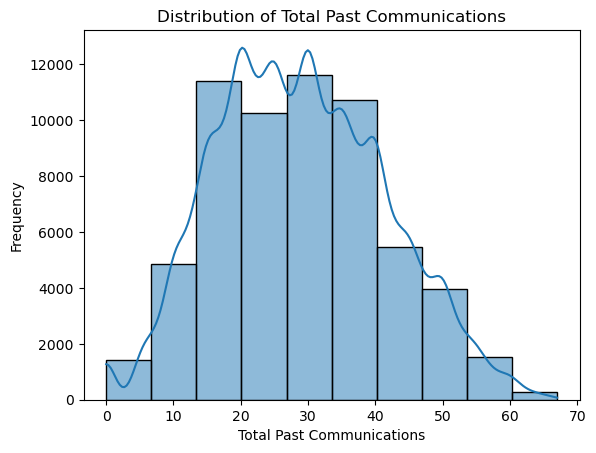

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure the column name is spelled correctly
sns.histplot(df["Total_Past_Communications"], bins=10, kde=True)
#you can also add below lines in the code but they are mostly for decoration

plt.title("Distribution of Total Past Communications")
plt.xlabel("Total Past Communications")
plt.ylabel("Frequency")
plt.show()


# how frequent is each email type in dataset

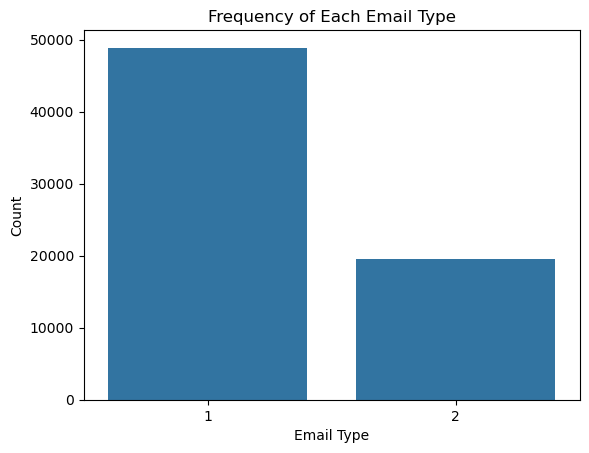

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Email_Type", data=df)
#you can also add below lines in the code but they are mostly for decoration

plt.title("Frequency of Each Email Type")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()


# does word count affect the email status

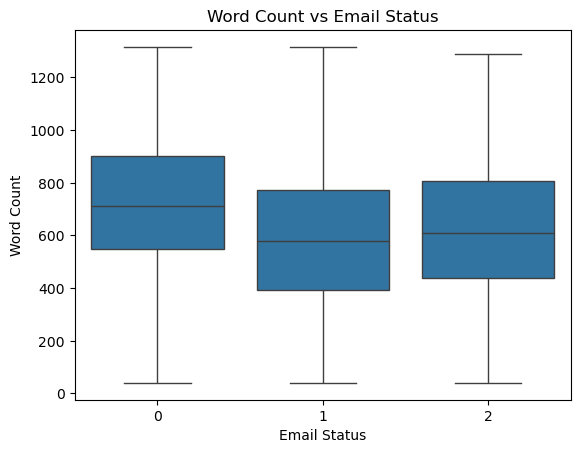

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Email_Status", y="Word_Count", data=df)
#you can also add below lines in the code but they are mostly for decoration

plt.title("Word Count vs Email Status")
plt.xlabel("Email Status")
plt.ylabel("Word Count")
plt.show()


# how does the number of image in email relate to the number of link

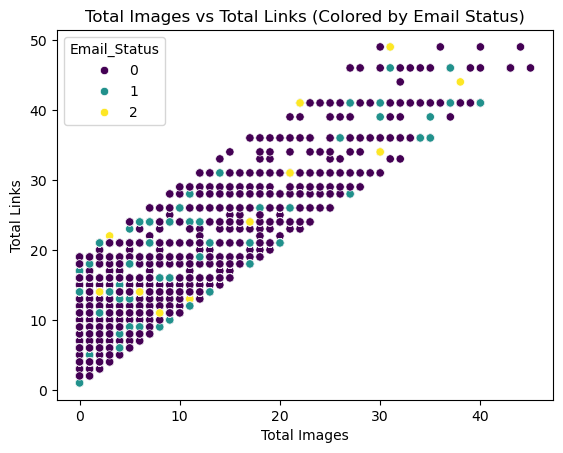

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Total_Images', y='Total_Links', hue='Email_Status', data=df, palette='viridis')
#you can also add below lines in the code but they are mostly for decoration

plt.title("Total Images vs Total Links (Colored by Email Status)")
plt.xlabel("Total Images")
plt.ylabel("Total Links")
plt.show()


In [45]:
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)


Unique values in 'Email_Type':
[1 2]
----------------------------------------
Unique values in 'Subject_Hotness_Score':
[2.2 2.1 0.1 3.  0.  3.2 0.7 0.5 0.2 1.  4.  1.9 1.6 0.3 1.1 2.3 1.4 0.8
 0.6 4.2 1.8 1.7 2.4 0.9 3.3 2.8 2.6 3.1 1.3 4.1 2.9 1.5 2.7 0.4 1.2 2.
 3.7 2.5 3.8 3.4 4.6 4.5 3.6 3.5 4.4 4.7 5.  3.9 4.3 4.8 4.9]
----------------------------------------
Unique values in 'Email_Source_Type':
[2 1]
----------------------------------------
Unique values in 'Customer_Location':
['E' 'others' 'B' 'C' 'G' 'D' 'F' 'A']
----------------------------------------
Unique values in 'Email_Campaign_Type':
[2 3 1]
----------------------------------------
Unique values in 'Total_Past_Communications':
[33. 15. 36. 25. 18. 34. 21. 40. 27. 24. 42. 11. 23. 37. 35. 51.  9. 39.
 31. 50. 30. 14. 45. 53. 28.  7. 38. 52. 22. 43. 12. 16. 20. 41. 56. 26.
 29.  5. 32. 44. 10. 17. 46. 47. 48.  8. 49. 13.  0.  6. 55. 19. 60. 59.
 61. 54. 62. 57. 64. 58. 65. 66. 67. 63.]
---------------------------------

In [70]:
for i in df.columns:
    print(i,'unique_count:',df[i].nunique(), '\n', df[i].unique(), '\n', df[i].value_counts().iloc[0:5],'\n')

Email_Type unique_count: 2 
 [1 2] 
 Email_Type
1    48866
2    19487
Name: count, dtype: int64 

Subject_Hotness_Score unique_count: 51 
 [2.2 2.1 0.1 3.  0.  1.5 3.2 0.7 2.  0.5 0.2 1.  4.  1.9 1.1 1.6 0.3 2.3
 1.4 1.7 2.8 1.2 0.8 0.6 4.2 1.8 2.4 0.9 1.3 3.3 2.6 3.1 4.1 2.9 2.7 0.4
 3.5 3.7 2.5 3.8 3.9 3.4 4.6 4.5 3.6 4.4 4.7 5.  4.3 4.8 4.9] 
 Subject_Hotness_Score
0.3    6889
0.2    6377
0.1    6022
0.0    5410
0.4    2022
Name: count, dtype: int64 

Email_Source_Type unique_count: 2 
 [2 1] 
 Email_Source_Type
1    37149
2    31204
Name: count, dtype: int64 

Customer_Location unique_count: 7 
 ['E' nan 'B' 'C' 'G' 'D' 'F' 'A'] 
 Customer_Location
G    23173
E    10193
D     7406
C     5758
F     4433
Name: count, dtype: int64 

Email_Campaign_Type unique_count: 3 
 [2 3 1] 
 Email_Campaign_Type
2    48273
3    19344
1      736
Name: count, dtype: int64 

Total_Past_Communications unique_count: 64 
 [33. 15. 36. 25. 18. nan 34. 21. 40. 27. 24. 42. 11. 23. 37. 35. 51.  9.
 39. 31. 

In [72]:
df['Customer_Location'] = df['Customer_Location'].replace(np.nan, 'others')

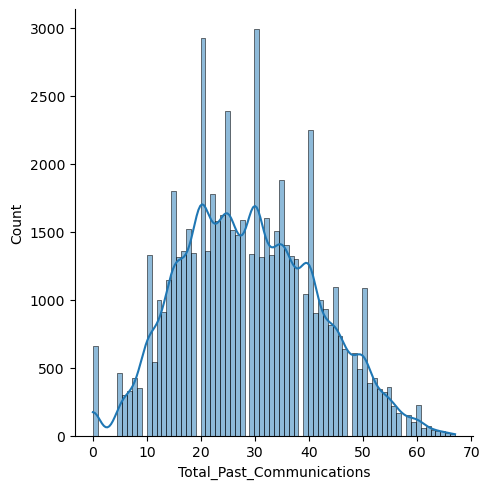

In [74]:
sns.displot(df['Total_Past_Communications'], kde = True)

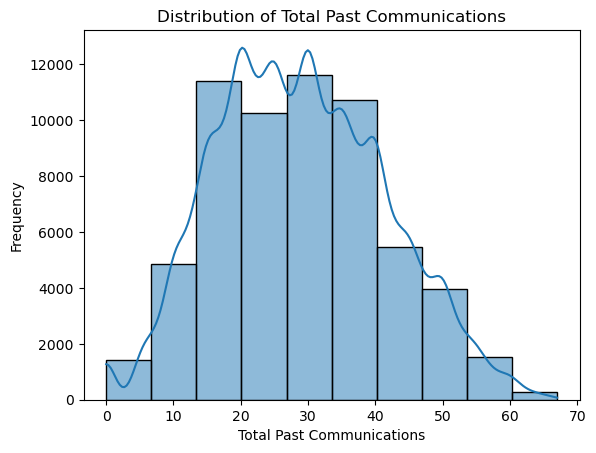

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure the column name is spelled correctly
sns.histplot(df["Total_Past_Communications"], bins=10, kde=True)
#you can also add below lines in the code but they are mostly for decoration

plt.title("Distribution of Total Past Communications")
plt.xlabel("Total Past Communications")
plt.ylabel("Frequency")
plt.show()


In [77]:
df.Total_Past_Communications.describe()

count    61528.000000
mean        28.933250
std         12.536518
min          0.000000
25%         20.000000
50%         28.000000
75%         38.000000
max         67.000000
Name: Total_Past_Communications, dtype: float64

In [80]:
df.Total_Past_Communications.mean()

28.93324990248342

In [82]:
df.Total_Past_Communications.median()

28.0

In [84]:
df.Total_Past_Communications.mode()[0]

30.0

In [86]:
df = df.dropna(subset=['Total_Past_Communications'])#removing missing values

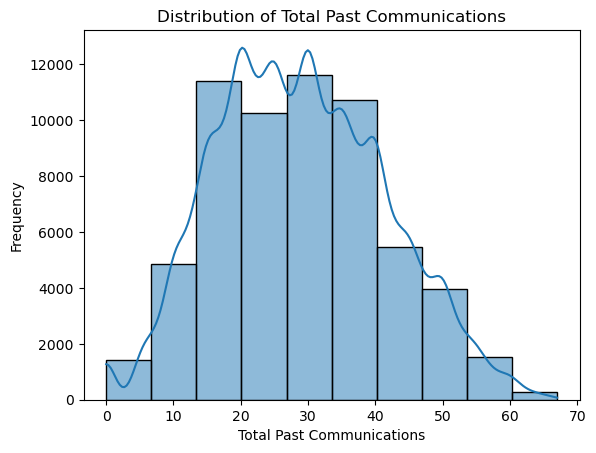

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure the column name is spelled correctly
sns.histplot(df["Total_Past_Communications"], bins=10, kde=True)
#you can also add below lines in the code but they are mostly for decoration

plt.title("Distribution of Total Past Communications")
plt.xlabel("Total Past Communications")
plt.ylabel("Frequency")
plt.show()


### better to replace w median

In [91]:
#df['Total_Past_Communications'] = df['Total_Past_Communications'].replace(np.nan, df.Total_Past_Communications.median())

In [93]:
df['Total_Links'] = df['Total_Links'].replace(np.nan, 0)
df['Total_Images'] = df['Total_Images'].replace(np.nan, 0)

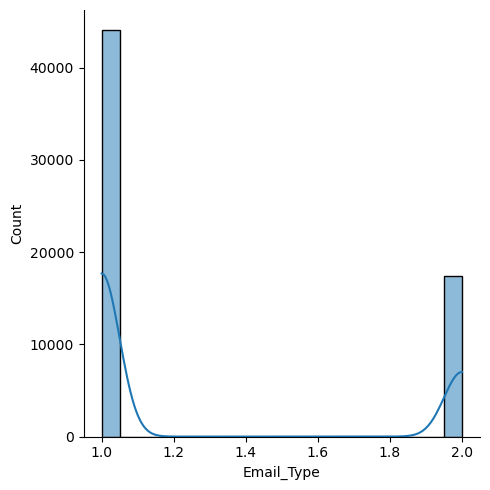

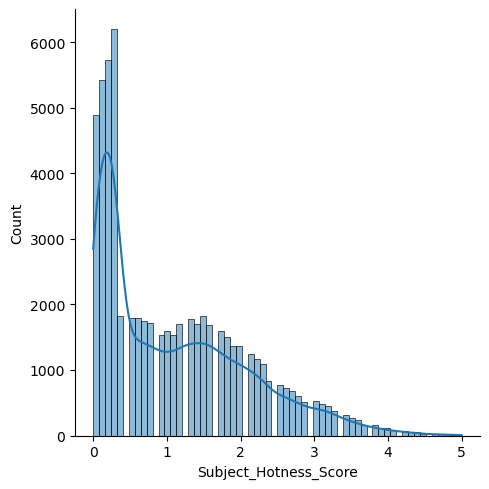

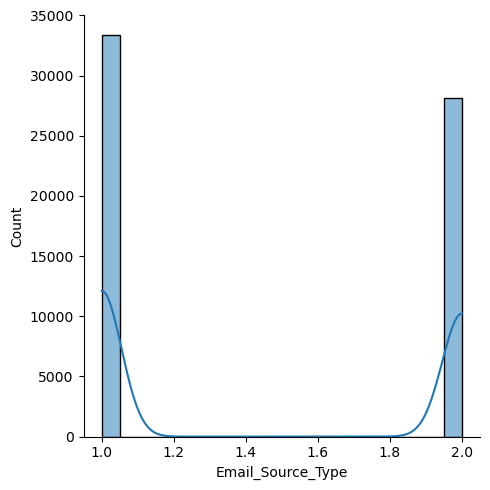

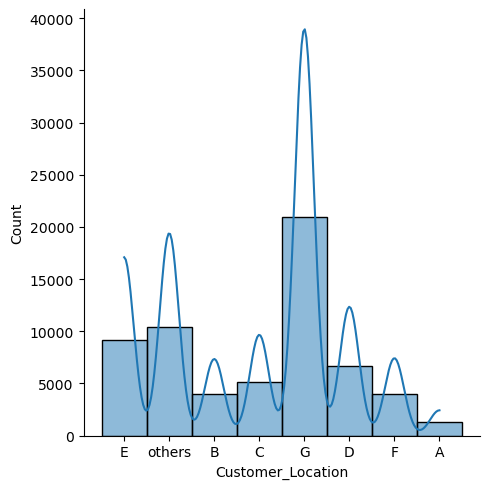

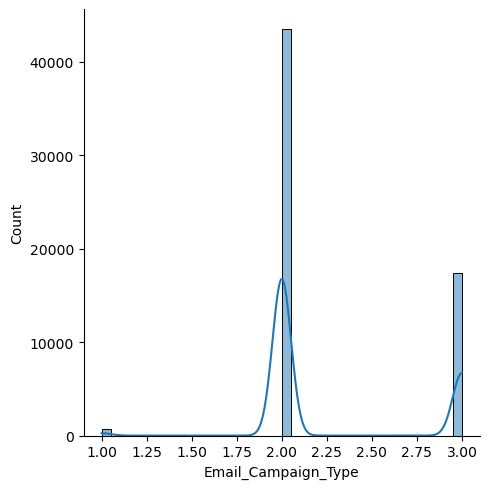

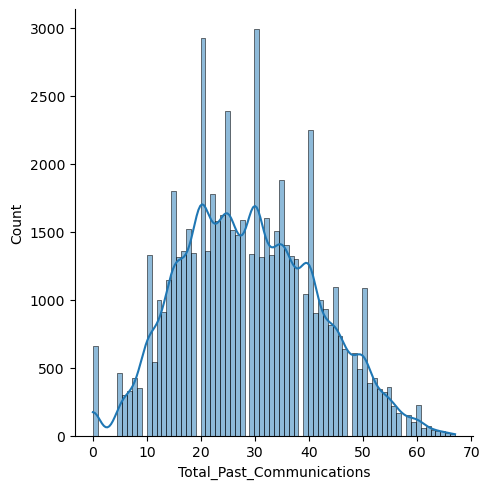

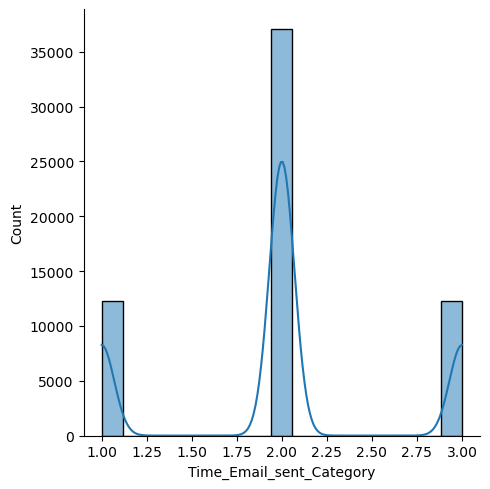

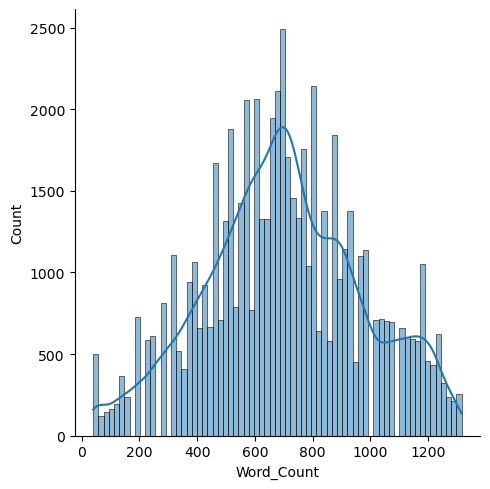

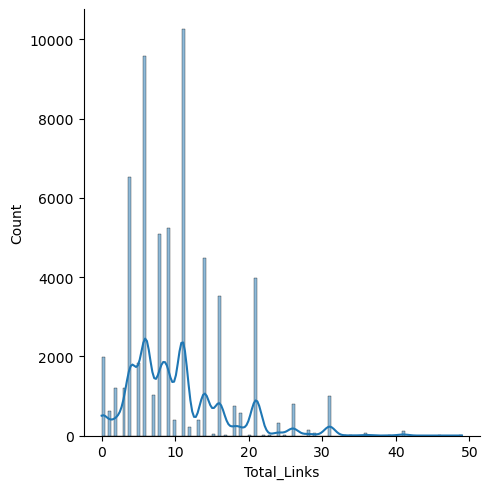

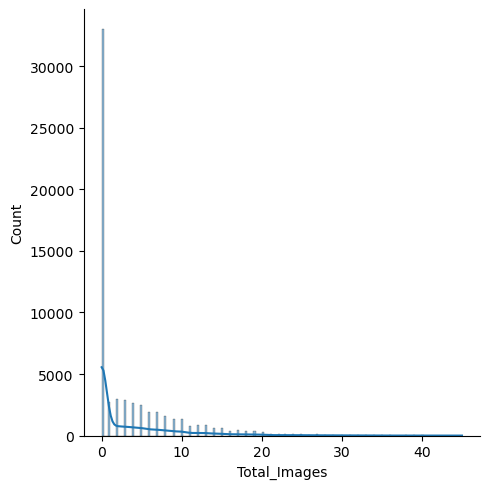

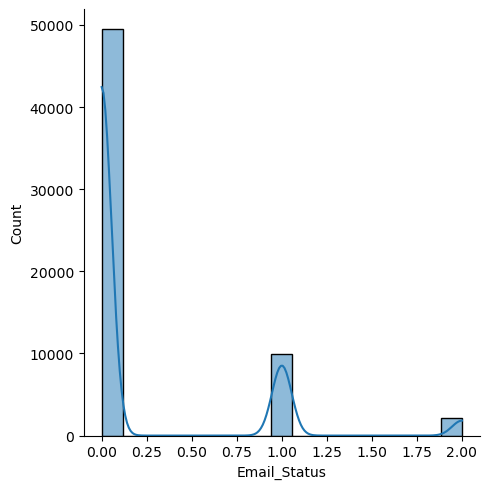

In [37]:
for i in df.columns:
    sns.displot(df[i], kde = True)

In [38]:
df.isnull().sum()

Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

In [39]:
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,2,2.1,1,others,2,15.0,2,504,5.0,0.0,0
2,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
for i in df.columns:
    plt.figure(figsize = (10,4))
    sns.boxplot(x = df[i])

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['Total_Past_Communications'] = df['Total_Past_Communications'].astype(int)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure the column name is spelled correctly
sns.histplot(df["Total_Past_Communications"], bins=10, kde=True)
#you can also add below lines in the code but they are mostly for decoration

plt.title("Distribution of Total Past Communications")
plt.xlabel("Total Past Communications")
plt.ylabel("Frequency")
plt.show()


In [ ]:
df['Total_Links'] = df['Total_Links'].astype(int)
df['Total_Images'] = df['Total_Images'].astype(int)

In [ ]:
df = pd.get_dummies(df, columns = ['Customer_Location'])

In [ ]:
df.info()

### Model Preparation

In [ ]:
x = df.drop(['Email_Status'], axis = 1).values
y = df['Email_Status'].values

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [ ]:
log.fit(x_train, y_train)

In [ ]:
log_pred = log.predict(x_test)
log_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
print(classification_report(y_test, log_pred, zero_division=0))

In [ ]:
print((log.score(x_train, y_train))*100)
print((log.score(x_test, y_test))*100)

### Support vector machine

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train) 

In [ ]:
svc_pred = model.predict(x_test)
svc_pred

In [ ]:
y_test

In [ ]:
print(classification_report(y_test, svc_pred, zero_division=0))

In [ ]:
print((model.score(x_train, y_train))*100)
print((model.score(x_test, y_test))*100)

### Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC()
lin_svc.fit(x_train, y_train) 

In [ ]:
lin_pred = lin_svc.predict(x_test)
lin_pred

In [ ]:
y_test

In [ ]:
print(classification_report(y_test, lin_pred, zero_division=0))

In [ ]:
print((lin_svc.score(x_train, y_train))*100)
print((lin_svc.score(x_test, y_test))*100)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

In [ ]:
dt_pred = clf.predict(x_test)
dt_pred

In [ ]:
y_test

In [ ]:
print(classification_report(y_test, dt_pred, zero_division=0))

In [ ]:
print((clf.score(x_train, y_train))*100)
print((clf.score(x_test, y_test))*100)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print((cross_val_score(clf, x_train, y_train).mean())*100)
print((cross_val_score(clf, x_test, y_test).mean())*100)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

In [ ]:
rf_pred = rf.predict(x_test)
rf_pred

In [ ]:
y_test

In [ ]:
print(classification_report(y_test, rf_pred, zero_division=0))

In [ ]:
print((rf.score(x_train, y_train))*100)
print((rf.score(x_test, y_test))*100)

In [ ]:
print((cross_val_score(rf, x_train, y_train).mean())*100)
print((cross_val_score(rf, x_test, y_test).mean())*100)

### Printing all score

In [ ]:
print("Logistic Regression")
print((log.score(x_train, y_train))*100)
print((log.score(x_test, y_test))*100)
print('---'*20)

print('SVC')
print((model.score(x_train, y_train))*100)
print((model.score(x_test, y_test))*100)
print('---'*20)

print('Linear SVC')
print((lin_svc.score(x_train, y_train))*100)
print((lin_svc.score(x_test, y_test))*100)
print('---'*20)

print('Decision Tree')
print((clf.score(x_train, y_train))*100)
print((clf.score(x_test, y_test))*100)
print('---'*20)

print('Random Forest')
print((rf.score(x_train, y_train))*100)
print((rf.score(x_test, y_test))*100)
print('---'*20)

print("Cross Val Score Decision Tree")
print((cross_val_score(clf, x_train, y_train).mean())*100)
print((cross_val_score(clf, x_test, y_test).mean())*100)
print('---'*20)

print("Cross Val Score Random forest")
print((cross_val_score(rf, x_train, y_train).mean())*100)
print((cross_val_score(rf, x_test, y_test).mean())*100)

**---** <br>
Logistic Regression <br>
80.43973498860953 <br>
80.55203355115576 <br>

SVC <br>
81.1148034359521 <br>
81.24451380083877 <br>

Linear SVC <br>
80.3603151712751 <br>
80.6056763873988 <br>

Decision Tree <br>
99.9811900432629 <br>
71.0621281576124 <br>

Random Forest <br>
99.97701005287688 <br>
80.94703989076368 <br>

Cross Val Score Decision Tree <br>
70.87800524442555 <br>
71.40838513064382 <br>

Cross Val Score Random forest <br>
80.58184666110402 <br>
80.88851811125492 <br>
